## Ultra Marathon Analysis

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Dataset/TWO_CENTURIES_OF_UM_RACES.csv')

/tmp/ipykernel_24516/3801898752.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/TWO_CENTURIES_OF_UM_RACES.csv')


### Overview of original dataset

In [5]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


#### Number of Rows & Columns

In [6]:
df.shape
# 13 columns, 7.4m entries

(7461195, 13)

In [7]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## Clean up the Data
- Analyse Only USA Races, 50km and 50miles, and 2020

In [10]:
df[df['Event distance/length'] == '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [11]:
# combine 50mi, 50km with isin
df[df['Event distance/length'].isin(['50km','50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


### Combining Races that are 50km and 50mile that occured in 2020

In [12]:
df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


Get all the races in USA

In [13]:
df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

51923      USA
51924      USA
51925      USA
51926      USA
51927      USA
          ... 
6417091    USA
6417092    USA
6417093    USA
6417094    USA
6417095    USA
Name: Event name, Length: 338, dtype: object

In [14]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


Comnime all the filters together

In [16]:
df2 = df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

Number of Rows dropped from 7.4m to 26k

In [78]:
df2.shape

(25857, 10)

In [18]:
# Remove (USA) from event name

In [19]:
df2['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

### Now the Event name doesn't have USA in its name

In [20]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

/tmp/ipykernel_24516/3473829760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [21]:
df2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


### Clean up Ahtelete Age

In [23]:
df2['athlete_age'] = 2020 - df2['Athlete year of birth']

/tmp/ipykernel_24516/3897931444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2020 - df2['Athlete year of birth']


- Remove h from athlete time

In [25]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

/tmp/ipykernel_24516/2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [26]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


- Drop columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete Age Categroy

In [28]:
df2 = df2.drop(columns=['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

In [29]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


- Clean up null values

In [31]:
df2.isnull().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

- See how many 'Athlete Age' is Null

In [32]:
df2[df2['athlete_age'].isna() == 1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


- Dropping the rows where Athlete Age is Null
- 233 rows won't affect the analysis less than 3% of the entire dataset.

In [33]:
df2 = df2.dropna()

In [34]:
df2.shape

(25857, 10)

- Check for duplicates

In [36]:
df2[df2.duplicated()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


- Reset Index

In [38]:
df2.reset_index(drop=True, inplace=True)

- Fix types

In [40]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [41]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [42]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [43]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int64
dtype: object

In [44]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


## Rename columns

In [46]:
df2 = df2.rename(columns={
    'Event name': 'race_name', 
    'Event dates': 'race_day',
    'Event distance/length': 'race_length', 
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance', 
    'Athlete average speed': 'athlete_average_speed', 
    'Athlete gender': 'athlete_gender',
    'Athlete ID': 'athlete_id',
    'Year of event': 'year'
    })

In [47]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


### Reorder Columns

In [49]:
df3 = df2[['race_day','race_name','race_length','race_number_of_finishers','athlete_id','athlete_gender','athlete_age','athlete_performance','athlete_average_speed','year']]

In [50]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020


- Find 2 races in 2020 with 222509 ID# - Sarasota | Everglades

In [79]:
df3[df3['race_name'] == 'Everglades 50 Mile Ultra Run '].head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year,race_month,race_season
7081,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,820757,M,27,8:31:39,9.436,2020,3,Spring
7082,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,46432,M,39,8:31:48,9.433,2020,3,Spring
7083,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,813617,M,34,8:34:43,9.380,2020,3,Spring
7084,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,820758,M,33,9:07:35,8.817,2020,3,Spring
7085,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,647115,M,30,9:15:32,8.691,2020,3,Spring


In [54]:
df3[(df3['race_name'] == 'Everglades 50 Mile Ultra Run ') & (df3['athlete_id'] == 222509)]

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year
7087,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,222509,M,23,9:19:10,8.634,2020


### Charts and Graphs

- Race Length and number of participants

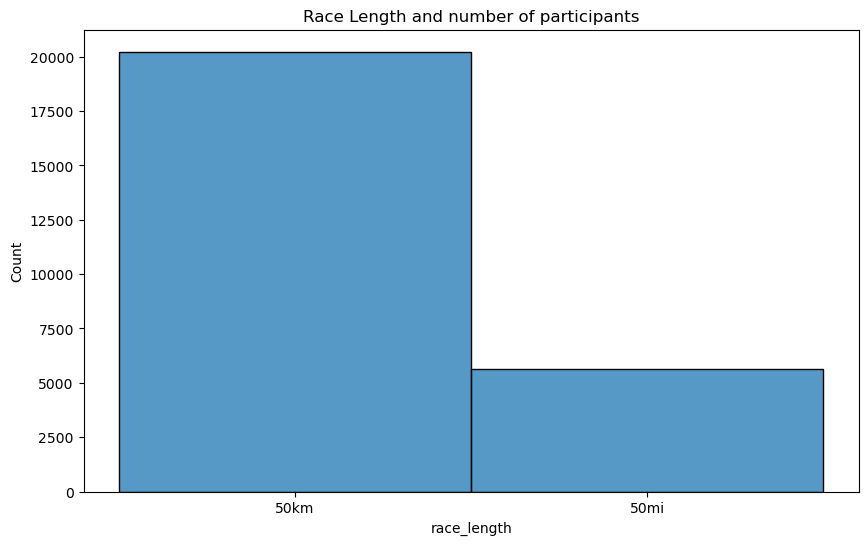

In [82]:
plt.figure(figsize=(10,6))
plt.title("Race Length and number of participants")
sns.histplot(df3['race_length']);
plt.show()

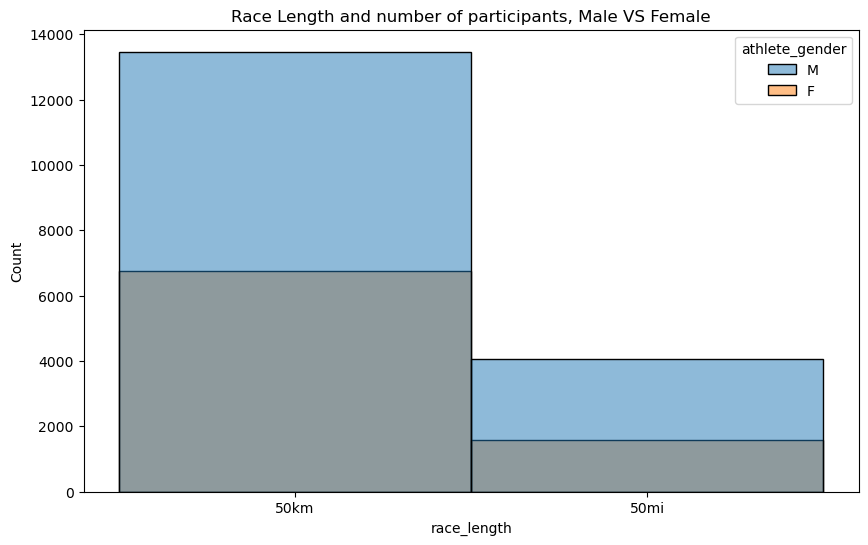

In [83]:
plt.figure(figsize=(10,6))
plt.title("Race Length and number of participants, Male VS Female")
sns.histplot(df3, x = 'race_length', hue='athlete_gender');

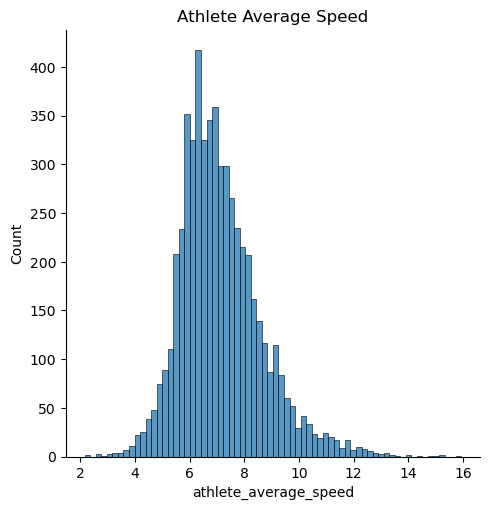

In [89]:
sns.displot(df3[df3['race_length']=='50mi']['athlete_average_speed'])
plt.title("Athlete Average Speed");

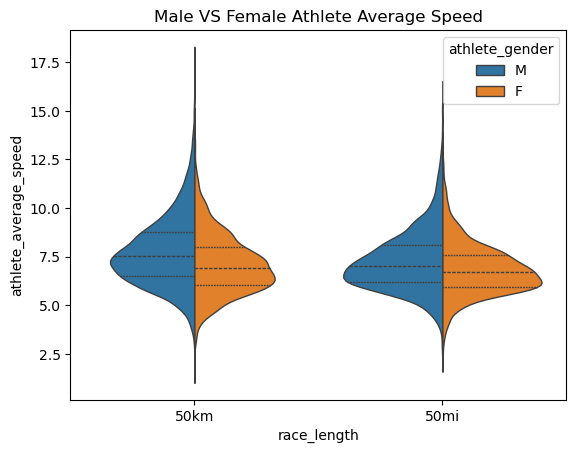

In [90]:
plot1 = sns.violinplot(data=df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True,inner='quart',linewidth=1);
plot1.figure.savefig('plot1.png')
plt.title("Male VS Female Athlete Average Speed");

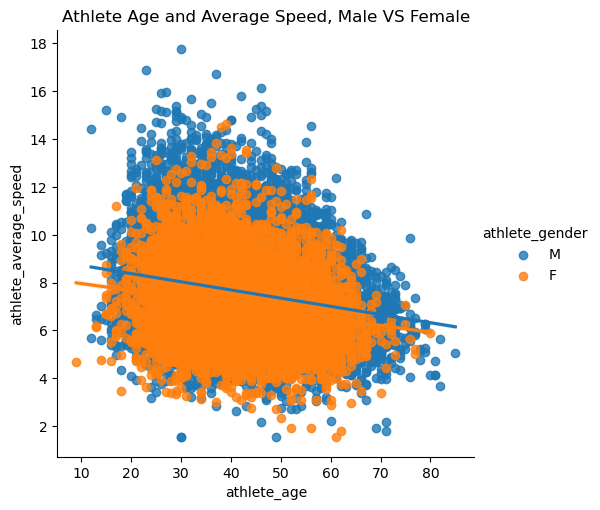

In [91]:
plot2 = sns.lmplot(data=df3, x='athlete_age', y='athlete_average_speed',hue='athlete_gender')
plot2.savefig('plot2.png')
plt.title("Athlete Age and Average Speed, Male VS Female");

### Questions to find out from the data

- Difference in speed for the 50k,50mi male to female

In [63]:
df3.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

- What age groups are the bset in the 50mi race (20 + races min) 15

In [93]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count > 19').head(10)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


- What age groups are the bset in the 50mi race (20 + races min) 20

In [94]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count > 9').head(10)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


### Seasons for the data _> slower in Summer than Winter else 'spring' if x in [3,4,5] else 'summer' if x in [6,7,8] else 'fall')
- Summer 6-8
- Fall 9-11
- Winter 12-2
- split between two decimals

In [69]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

/tmp/ipykernel_24516/3078284804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)


In [70]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year,race_month
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020,2
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020,2
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020,2
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020,2
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020,2


In [96]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

/tmp/ipykernel_24516/2130733745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')


In [72]:
df3.head(25)

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year,race_month,race_season
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020,2,Winter
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020,2,Winter
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020,2,Winter
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020,2,Winter
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020,2,Winter
5,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810282,F,35,4:42:06,10.635,2020,2,Winter
6,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,11739,M,59,4:49:20,10.369,2020,2,Winter
7,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,80394,M,50,4:49:50,10.351,2020,2,Winter
8,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,140909,F,45,4:51:00,10.309,2020,2,Winter
9,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,753889,M,41,5:02:35,9.915,2020,2,Winter


In [97]:
## Query to get the average speed of athletes groupby race season and speed
# df3.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg['mean','count'].sort_values('mean',ascending=False)
# df3.groupby('race_season')['athlete_average_speed'].agg['mean','count'].sort_values('mean',ascending=False)

## An overview of numeric values in the (cleaned) dataset.

<Axes: >

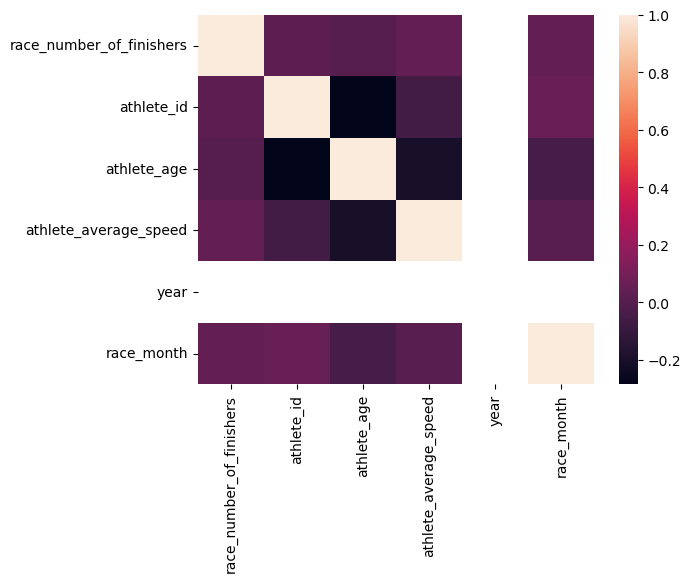

In [75]:
sns.heatmap(df3.corr(numeric_only=True))